##                                    BORSALAR VE ALTIN! #

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
def yfinance_veri_cek(sembol, baslangic_tarih, bitis_tarih, frekans):
    liste = []

    for s in sembol:
        tarihsel = yf.download(
            tickers=s,
            start=baslangic_tarih,
            end=bitis_tarih,
            interval=frekans
        )

        veriler_df_alt = pd.DataFrame(tarihsel).reset_index()
        veriler_df_alt = veriler_df_alt[['Date','Adj Close']].rename(columns={'Date':'Tarih','Adj Close':f'{s.replace(".IS","")}'})
        liste.append(veriler_df_alt)

    veriler_df = liste[0]
    for i in range(1,len(liste)):
        veriler_df = pd.merge(veriler_df, liste[i], on='Tarih', how='outer')

    return veriler_df

In [3]:
# sembol = ['^IXIC', '^DJI', '^GSPC']
# baslangic_tarih = '1999-01-01'
# bitis_tarih = '2024-05-10'
# frekans = '1wk'

# veriler_df = yf.download(tickers=sembol, start=baslangic_tarih, end=bitis_tarih, interval=frekans)

# plt.plot(veriler_df.index, veriler_df['Adj Close']['^IXIC'], label='Nasdaq (^IXIC)', color='red')
# plt.plot(veriler_df.index, veriler_df['Adj Close']['^DJI'], label='Dow Jones (^DJI)', color='blue')
# plt.plot(veriler_df.index, veriler_df['Adj Close']['^GSPC'], label='S&P 500 (^GSPC)', color='green')

# # labels and title
# plt.xlabel('Tarih')
# plt.ylabel('Fiyat')
# plt.title('Amerika Borsalarında Haftalık Kapanış Verileri (1999-2024)')
# plt.legend()
# plt.grid(True)
# plt.show()

"""

Bazı frekans bilgileri:
    1h: 1 saatlik,
    1d: 1 günlük,
    1wk: 1 haftalık,
    1mo: 1 aylık

"""

#### BİST 100'DEN 27 Temmuz'da İKİ SIFIR ATILDIĞI İÇİN YAHOO FINANCE VERİLERİNİ FIXLEME KODU

In [4]:
def endeks_basamak_kontrol(df_duzeltilecek):
    tarih = '2020-07-27'

    problem_df = df_duzeltilecek[df_duzeltilecek['Tarih'] < tarih]
    normal_df = df_duzeltilecek[df_duzeltilecek['Tarih'] >= tarih]

    xu_sutunlar = [xu for xu in problem_df.columns if xu.startswith('XU')]

    for xu_sutun in xu_sutunlar:
        for index, value in enumerate(problem_df[xu_sutun]):
            problem_df.at[index, xu_sutun] = value / 100

    veriler_df = pd.concat([problem_df, normal_df], ignore_index=True)

    return veriler_df

# 2007-2008 Lehman Brothers Krizi
##### ABD’de 2007 yılında düşük gelir seviyesindeki tasarruf sahiplerine kullandırılan riskli konut kredilerinin geri ödemelerinde ortaya çıkan güçlük, 2008 Küresel Ekonomik Krizi’nin temel nedeni oldu. Kredilerin geri ödenemesinden dolayı finans piyasalarında dalgalanmalar başladı ve zamanla derinlik kazanarak küresel bir finans krizine dönüştü. Piyasalarda bir anlık nakit kıtlığı neticesinde büyük finansal şirketler iflas etmeye başladı ve Amerika’nın büyük finans kuruluşları dahi battığını açıkladı. 158 yıllık yatırım bankası olan Lehman Brothers 15 Eylül 2008 tarihinde 613 milyar dolarlık borçla iflas etti. Kara Pazartesi olarak anılan günün ardından finans devleri bir bir çöktü. ABD yönetimi dev mortgage şirketleri Fannie Mae ve Freddie Mac'e el koydu. (*1)

## Dünya borsalarının 2007-2008 Lehman Krizine Tepkisi
#### 2008-2009 zamanı borsalarda büyük bir çöküş yaşamıştır.


In [5]:
NASDAQ = yf.download("^IXIC", start="2008-01-01", end="2009-02-01")
Dowjones = yf.download("^DJI", start="2008-01-01", end="2009-02-01")
SP500 = yf.download("^GSPC", start="2008-01-01", end="2009-02-01")
İngiltere = yf.download("^FTSE", start="2008-01-01", end="2009-02-01")
Almanya = yf.download("^GDAXI", start="2008-01-01", end="2009-02-01")
Japonya = yf.download("^N225", start="2008-01-01", end="2009-02-01")
Fransa = yf.download("^FCHI", start="2008-01-01", end="2009-02-01")
Çin = yf.download("000001.SS", start="2008-01-01", end="2009-02-01")
HongKong = yf.download("^HSI", start="2008-01-01", end="2009-02-01")
Altin = yf.download("GC=F", start="2008-01-01", end="2009-02-01")
Türkiye = yf.download('^XU100', start='2008-01-01', end='2009-02-01')



# Son fiyatı ve ilk fiyatı al
son_fiyat = NASDAQ["Adj Close"][-1]
ilk_fiyat = NASDAQ["Adj Close"][0]
son_fiyat1 = Dowjones["Adj Close"][-1]
ilk_fiyat1 = Dowjones["Adj Close"][0]
son_fiyat2 = SP500["Adj Close"][-1]
ilk_fiyat2 = SP500["Adj Close"][0]
son_fiyat3 = İngiltere["Adj Close"][-1]
ilk_fiyat3 = İngiltere["Adj Close"][0]
son_fiyat4 = Almanya["Adj Close"][-1]
ilk_fiyat4 = Almanya["Adj Close"][0]
son_fiyat5 = Japonya["Adj Close"][-1]
ilk_fiyat5 = Japonya["Adj Close"][0]
son_fiyat6 = Fransa["Adj Close"][-1]
ilk_fiyat6 = Fransa["Adj Close"][0]
son_fiyat7 = Çin["Adj Close"][-1]
ilk_fiyat7 = Çin["Adj Close"][0]
son_fiyat8 = HongKong["Adj Close"][-1]
ilk_fiyat8 = HongKong["Adj Close"][0]
son_fiyat9 = Altin["Adj Close"][-1]
ilk_fiyat9 = Altin["Adj Close"][0]
son_fiyat10 = Türkiye["Adj Close"][-1]
ilk_fiyat10 = Türkiye["Adj Close"][0]



# Nominal getiri
nominal_getiri = ((son_fiyat - ilk_fiyat) / ilk_fiyat) * 100
nominal_getiri1 = ((son_fiyat1 - ilk_fiyat1) / ilk_fiyat1) * 100
nominal_getiri2 = ((son_fiyat2 - ilk_fiyat2) / ilk_fiyat2) * 100
nominal_getiri3 = ((son_fiyat3 - ilk_fiyat3) / ilk_fiyat3) * 100
nominal_getiri4 = ((son_fiyat4 - ilk_fiyat4) / ilk_fiyat4) * 100
nominal_getiri5 = ((son_fiyat5 - ilk_fiyat5) / ilk_fiyat5) * 100
nominal_getiri6 = ((son_fiyat6 - ilk_fiyat6) / ilk_fiyat6) * 100
nominal_getiri7 = ((son_fiyat7 - ilk_fiyat7) / ilk_fiyat7) * 100
nominal_getiri8 = ((son_fiyat8 - ilk_fiyat8) / ilk_fiyat8) * 100
nominal_getiri9 = ((son_fiyat9 - ilk_fiyat9) / ilk_fiyat9) * 100
nominal_getiri10 = ((son_fiyat10 - ilk_fiyat10) / ilk_fiyat10) * 100


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\BERK\AppData\Local\Temp\ipykernel_9988\3732408096.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

In [6]:
data = {
    "Borsalar ve Altın": ["NASDAQ", "Dow Jones", "S&P 500", "İngiltere", "Almanya", "Japonya", "Fransa", "Çin", "Hong Kong", "Altın", "Türkiye"],
    "Nominal Getiri (%)": [nominal_getiri, nominal_getiri1, nominal_getiri2, nominal_getiri3, nominal_getiri4, nominal_getiri5, nominal_getiri6, nominal_getiri7, nominal_getiri8, nominal_getiri9, nominal_getiri10]
}

# Verileri Pandas yardımıyla Veri yapısına dönüştürelim
df = pd.DataFrame(data)

print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False, numalign="center", stralign="center", floatfmt='.1f'))

╒═════════════════════╤══════════════════════╕
│  Borsalar ve Altın  │  Nominal Getiri (%)  │
╞═════════════════════╪══════════════════════╡
│       NASDAQ        │        -43.4         │
├─────────────────────┼──────────────────────┤
│      Dow Jones      │        -38.7         │
├─────────────────────┼──────────────────────┤
│       S&P 500       │        -42.9         │
├─────────────────────┼──────────────────────┤
│      İngiltere      │        -35.3         │
├─────────────────────┼──────────────────────┤
│       Almanya       │        -45.4         │
├─────────────────────┼──────────────────────┤
│       Japonya       │        -45.6         │
├─────────────────────┼──────────────────────┤
│       Fransa        │        -46.4         │
├─────────────────────┼──────────────────────┤
│         Çin         │        -62.2         │
├─────────────────────┼──────────────────────┤
│      Hong Kong      │        -51.8         │
├─────────────────────┼──────────────────────┤
│        Altı

##### Türkiye de diğer ülkeler gibi küresel krizden etkilendi. Krizin asıl etkisi 2009 yılında görüldü ve Türkiye ekonomik küçülme yaşadı. Ardından bir toparlanma geldiyse de bu toparlanma uzun sürmedi ve inişli çıkışlı bir ekonomik gidiş yaşanmaya başladı. 2018 yılında başlayan küçülme süreci 2019 yılının ilk iki çeyreğinde de devam etti ve Türkiye yüksek enflasyonla küçülmenin bir arada yaşandığı slumpflasyon olgusuyla karşılaştı. Bu durum, gelişmiş ülkelerde görülen resesyon olgusundan farklıydı çünkü oralarda yüksek enflasyon yoktu. (*1)


[*********************100%%**********************]  1 of 1 completed


Text(0.5, 1.0, 'Türkiye Borsa 2008 Krizine Tepkisi')

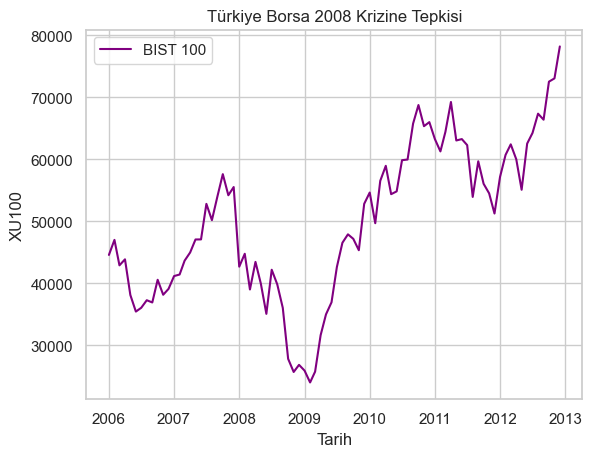

In [7]:
sembol = ['XU100.IS']
baslangic_tarih = '2006-01-01'
bitis_tarih = '2013-01-01'
frekans = '1mo'
veriler_df = yfinance_veri_cek(
    sembol = sembol,
    baslangic_tarih = baslangic_tarih,
    bitis_tarih = bitis_tarih,
    frekans = frekans
)

sns.set_theme(style='whitegrid')
sns.lineplot(
    data=veriler_df,
    x='Tarih',
    y='XU100',
    color='purple',
    label='BIST 100'
    )

plt.title('Türkiye Borsa 2008 Krizine Tepkisi')

In [8]:
# sembol = ['^FTSE', '^GDAXI', '^N225', '^FCHI', '000001.SS', '^HSI']
# baslangic_tarih = '2006-01-01'
# bitis_tarih = '2015-01-01'
# frekans = '1mo'

# veriler_df = yfinance_veri_cek(
#     sembol = sembol,
#     baslangic_tarih = baslangic_tarih,
#     bitis_tarih = bitis_tarih,
#     frekans = frekans
# )

# plt.plot(
#     'Tarih',
#     '^FTSE',
#     data=veriler_df,
#     color='red',
#     label= 'İngiltere = £'
# )
# plt.plot(
#     'Tarih',
#     '^GDAXI',
#     data=veriler_df,
#     color='blue',
#     label= 'Almanya = €'
# )
# plt.plot(
#     'Tarih',
#     '^N225',
#     data=veriler_df,
#     color='purple',
#     label= 'Japonya = ¥'
# )
# plt.plot(
#     'Tarih',
#     '^FCHI',
#     data=veriler_df,
#     color='orange',
#     label= 'Fransa = €'
# )
# plt.plot(
#     'Tarih',
#     '000001.SS',
#     data=veriler_df,
#     color='green',
#     label= 'Çin = ¥'
# )
# plt.plot(
#     'Tarih',
#     '^HSI',
#     data=veriler_df,
#     color='black',
#     label= 'Hong Kong = HK$'
# )



# plt.xlabel('Tarih')
# plt.ylabel('Fiyat')
# plt.legend()
# plt.title('2007-2008 Krizinin Dünya Borsasının Tepkileri')

In [9]:
# sembol = ['GC=F']
# baslangic_tarih = '2006-01-01'
# bitis_tarih = '2015-01-01'
# frekans = '1mo'
    
# veriler_df = yfinance_veri_cek(
#     sembol = sembol,
#     baslangic_tarih = baslangic_tarih,
#     bitis_tarih = bitis_tarih,
#     frekans = frekans
# )


# plt.plot(
#     'Tarih',
#     'GC=F',
#     data=veriler_df,
#     color='orange'
# )
# plt.xlabel('Tarih')
# plt.ylabel('Fiyat=$')
# plt.grid(True)
# plt.title('ALTININ 2007-2008 KRİZİNE TEPKİSİ')
# plt.show()

In [10]:
# sembol = ['^IXIC', '^DJI', '^GSPC']
# baslangic_tarih = '2006-01-01'
# bitis_tarih = '2015-01-01'
# frekans = '1wk'

# veriler_df = yf.download(tickers=sembol, start=baslangic_tarih, end=bitis_tarih, interval=frekans)

# plt.plot(veriler_df.index, veriler_df['Adj Close']['^IXIC'], label='Nasdaq (^IXIC)', color='red')
# plt.plot(veriler_df.index, veriler_df['Adj Close']['^DJI'], label='Dow Jones (^DJI)', color='blue')
# plt.plot(veriler_df.index, veriler_df['Adj Close']['^GSPC'], label='S&P 500 (^GSPC)', color='green')

# # labels and title
# plt.xlabel('Tarih')
# plt.ylabel('Fiyat')
# plt.title('Amerika Borsalarının 2007-2008 krizine tepkisi')
# plt.legend()
# plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Text(0.5, 1.0, 'Amerika Borsalarının 2008 Krizine Tepkisi')

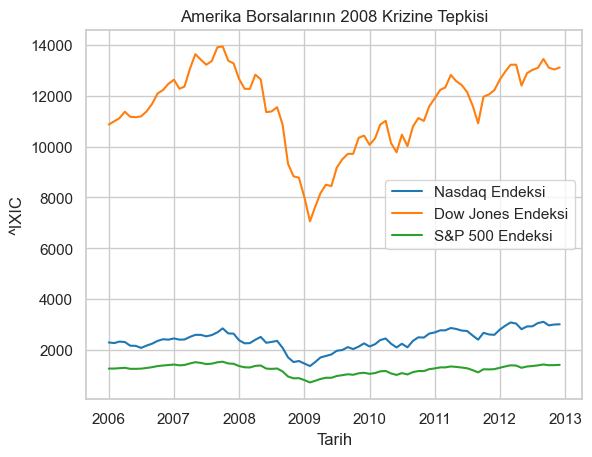

In [11]:
sembol = ['^IXIC', '^DJI', '^GSPC']
baslangic_tarih = '2006-01-01'
bitis_tarih = '2013-01-01'
frekans = '1mo'

veriler_df = yfinance_veri_cek(
    sembol = sembol,
    baslangic_tarih = baslangic_tarih,
    bitis_tarih = bitis_tarih,
    frekans = frekans
)
sns.set_theme(style='whitegrid', palette='tab10')
sns.lineplot(
    data=veriler_df,
    x='Tarih',
    y='^IXIC',
    # color='orange',
    label='Nasdaq Endeksi',
    )
sns.lineplot(
    data=veriler_df,
    x='Tarih',
    y='^DJI',
    # color='red',
    label='Dow Jones Endeksi'
    )
sns.lineplot(
    data=veriler_df,
    x='Tarih',
    y='^GSPC',
    # color='green',
    label='S&P 500 Endeksi'
    )
plt.title('Amerika Borsalarının 2008 Krizine Tepkisi')


[*********************100%%**********************]  1 of 1 completed


Text(0.5, 1.0, "Altın'ın 2008 Krizine Tepkisi")

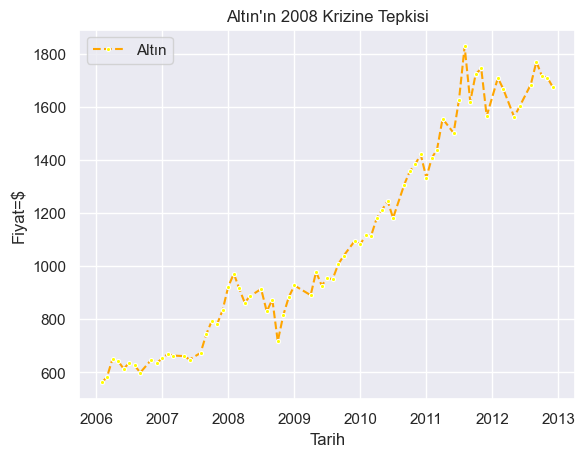

In [12]:
sembol = ['GC=F']
baslangic_tarih = '2006-01-01'
bitis_tarih = '2013-01-01'
frekans = '1mo'
    
veriler_df = yfinance_veri_cek(
    sembol = sembol,
    baslangic_tarih = baslangic_tarih,
    bitis_tarih = bitis_tarih,
    frekans = frekans
)
sns.set_theme(style='darkgrid')

sns.lineplot(
    data=veriler_df,
    x='Tarih',
    y='GC=F',
    color='orange',
    label='Altın',
    marker='o',
    markersize=3,
    markerfacecolor='yellow',
    linestyle='--',
    dashes=True,
    )
plt.xlabel('Tarih')
plt.ylabel('Fiyat=$')
plt.title("Altın'ın 2008 Krizine Tepkisi")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Text(0.5, 1.0, 'Dünya Borsasının 2008 Krizine Tepkileri')

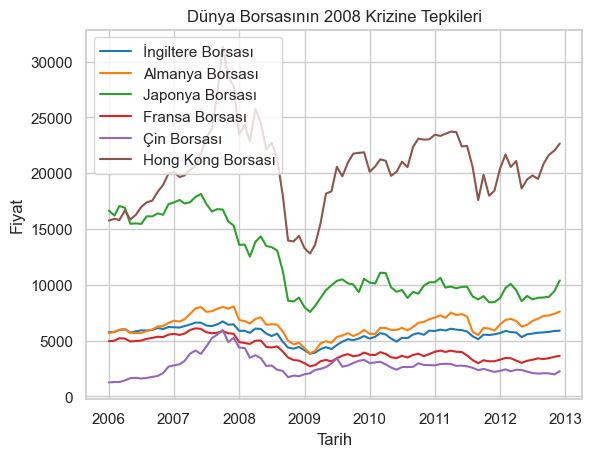

In [31]:
sembol = ['^FTSE', '^GDAXI', '^N225', '^FCHI', '000001.SS', '^HSI']
baslangic_tarih = '2006-01-01'
bitis_tarih = '2013-01-01'
frekans = '1mo'

veriler_df = yfinance_veri_cek(
    sembol = sembol,
    baslangic_tarih = baslangic_tarih,
    bitis_tarih = bitis_tarih,
    frekans = frekans
)
sns.set_theme(context='notebook', style='whitegrid', palette='tab10')#, font='sans-serif', font_scale=1, color_codes=True, rc=None)


sns.lineplot(
    data=veriler_df,
    x='Tarih',
    y='^FTSE',

    label='İngiltere Borsası',
    )
sns.lineplot(
    data=veriler_df,
    x='Tarih',
    y='^GDAXI',
    # color='red',
    label='Almanya Borsası'
    )
sns.lineplot(
    data=veriler_df,
    x='Tarih',
    y='^N225',
    # color='green',
    label='Japonya Borsası'
    )
sns.lineplot(
    data=veriler_df,
    x='Tarih',
    y='^FCHI',
    # color='b',
    label='Fransa Borsası',
    )
sns.lineplot(
    data=veriler_df,
    x='Tarih',
    y='000001.SS',
    # color='b',
    label='Çin Borsası',
    )
sns.lineplot(
    data=veriler_df,
    x='Tarih',
    y='^HSI',
    # color='b',
    label='Hong Kong Borsası',
    )
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.grid(True)
plt.title('Dünya Borsasının 2008 Krizine Tepkileri')

## COVID-19 SALGININA BORSALARININ TEPKİSİ

##### *COVID-19 küresel salgınına karşı alınan tedbirler sebebiyle, 22 Nisan 2020 itibarıyla dünyada yaklaşık 2,26 milyar iş görenin (dünya işgücünün yaklaşık %70’inin) olumsuz etkilendiği ileri sürülmektedir. ILO’nun (Uluslararası Çalışma Örgütü) son tahminlerine göre 2020 yılının ilk çeyreğinde dünyada çalışma saati itibarıyla toplam istihdam, kriz öncesine (2019’un son çeyreğine oranla) %4,5 azalmıştır. Bu da haftalık çalışma süresi 48 saat kabul edildiğinde 130 milyon (tam süreli) “iş”e tekabül etmektedir. ILO’ya göre, istihdamdaki daralma devam edecek ve 2020’nin ikinci çeyreğinde toplam çalışma saatleri, 2019’un son çeyreğine göre %10,5 oranında azalacaktır ki bu 300 milyondan fazla tam süreli işin kaybı anlamına gelmektedir (ILO, 2020a; Balcı, 2020). 

##### Krizin şimdiye kadar gözlemlenen etkilerine bakarak, çoğu sektör bakımından ve toplam olarak istihdamda daralma ve işsizlik etkisine rağmen bazı sektörlerde aksi bir trendin ortaya çıkabileceği söylenebilir. Bu gibi iş ve mesleklere örnek olarak sağlık, iletişim-bilişim sektörü, tedarik zinciri ve dağıtımla ilgili işler verilebilir. (*2)



In [14]:
NASDAQ = yf.download("^IXIC", start="2020-01-01", end="2024-01-01")
Dowjones = yf.download("^DJI", start="2020-01-01", end="2024-01-01")
SP500 = yf.download("^GSPC", start="2020-01-01", end="2024-01-01")
İngiltere = yf.download("^FTSE", start="2020-01-01", end="2024-01-01")
Almanya = yf.download("^GDAXI", start="2020-01-01", end="2024-01-01")
Japonya = yf.download("^N225", start="2020-01-01", end="2024-01-01")
Fransa = yf.download("^FCHI", start="2020-01-01", end="2024-01-01")
Çin = yf.download("000001.SS", start="2020-01-01", end="2024-01-01")
HongKong = yf.download("^HSI", start="2020-01-01", end="2024-01-01")
Altin = yf.download("GC=F", start="2020-01-01", end="2024-01-01")
Türkiye = yf.download('XU100.IS', start='2020-01-01', end='2024-01-01')
Türkiye = Türkiye['Close']

# 27 Temmuz 2020 yılından itibaren verileri 100 ile çarpma (endekslerden iki sıfır atıldığı için)
Türkiye.loc['2020-07-27':] *= 100
ilk_fiyat10 = Türkiye[0]
son_fiyat10 = Türkiye[-1]
nominal_getiri10 = ((son_fiyat10 - ilk_fiyat10) / ilk_fiyat10) * 100



# Son fiyatı ve ilk fiyatı al
son_fiyat = NASDAQ["Adj Close"][-1]
ilk_fiyat = NASDAQ["Adj Close"][0]
son_fiyat1 = Dowjones["Adj Close"][-1]
ilk_fiyat1 = Dowjones["Adj Close"][0]
son_fiyat2 = SP500["Adj Close"][-1]
ilk_fiyat2 = SP500["Adj Close"][0]
son_fiyat3 = İngiltere["Adj Close"][-1]
ilk_fiyat3 = İngiltere["Adj Close"][0]
son_fiyat4 = Almanya["Adj Close"][-1]
ilk_fiyat4 = Almanya["Adj Close"][0]
son_fiyat5 = Japonya["Adj Close"][-1]
ilk_fiyat5 = Japonya["Adj Close"][0]
son_fiyat6 = Fransa["Adj Close"][-1]
ilk_fiyat6 = Fransa["Adj Close"][0]
son_fiyat7 = Çin["Adj Close"][-1]
ilk_fiyat7 = Çin["Adj Close"][0]
son_fiyat8 = HongKong["Adj Close"][-1]
ilk_fiyat8 = HongKong["Adj Close"][0]
son_fiyat9 = Altin["Adj Close"][-1]
ilk_fiyat9 = Altin["Adj Close"][0]


# Nominal getiriyi hesaplayalım
nominal_getiri = ((son_fiyat - ilk_fiyat) / ilk_fiyat) * 100
nominal_getiri1 = ((son_fiyat1 - ilk_fiyat1) / ilk_fiyat1) * 100
nominal_getiri2 = ((son_fiyat2 - ilk_fiyat2) / ilk_fiyat2) * 100
nominal_getiri3 = ((son_fiyat3 - ilk_fiyat3) / ilk_fiyat3) * 100
nominal_getiri4 = ((son_fiyat4 - ilk_fiyat4) / ilk_fiyat4) * 100
nominal_getiri5 = ((son_fiyat5 - ilk_fiyat5) / ilk_fiyat5) * 100
nominal_getiri6 = ((son_fiyat6 - ilk_fiyat6) / ilk_fiyat6) * 100
nominal_getiri7 = ((son_fiyat7 - ilk_fiyat7) / ilk_fiyat7) * 100
nominal_getiri8 = ((son_fiyat8 - ilk_fiyat8) / ilk_fiyat8) * 100
nominal_getiri9 = ((son_fiyat9 - ilk_fiyat9) / ilk_fiyat9) * 100

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\BERK\AppData\Local\Temp\ipykernel_9988\4148059876.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [15]:
data = {
    "Borsalar ve Altın": ["NASDAQ", "Dow Jones", "S&P 500", "İngiltere", "Almanya", "Japonya", "Fransa", "Çin", "Hong Kong", "Altın", "Türkiye"],
    "Nominal Getiri (%)": [nominal_getiri, nominal_getiri1, nominal_getiri2, nominal_getiri3, nominal_getiri4, nominal_getiri5, nominal_getiri6, nominal_getiri7, nominal_getiri8, nominal_getiri9, nominal_getiri10]
}

# Verileri Pandas yardımıyla Veri yapısına dönüştürelim
df = pd.DataFrame(data) 

print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False, numalign="center", stralign="center", floatfmt='.1f'))

╒═════════════════════╤══════════════════════╕
│  Borsalar ve Altın  │  Nominal Getiri (%)  │
╞═════════════════════╪══════════════════════╡
│       NASDAQ        │         65.1         │
├─────────────────────┼──────────────────────┤
│      Dow Jones      │         30.6         │
├─────────────────────┼──────────────────────┤
│       S&P 500       │         46.4         │
├─────────────────────┼──────────────────────┤
│      İngiltere      │         1.7          │
├─────────────────────┼──────────────────────┤
│       Almanya       │         25.1         │
├─────────────────────┼──────────────────────┤
│       Japonya       │         44.2         │
├─────────────────────┼──────────────────────┤
│       Fransa        │         24.9         │
├─────────────────────┼──────────────────────┤
│         Çin         │         -3.6         │
├─────────────────────┼──────────────────────┤
│      Hong Kong      │        -40.3         │
├─────────────────────┼──────────────────────┤
│        Altı

#### İlk Türkiye'yi İnceleyelim

In [18]:
veriler_df = yfinance_veri_cek(
    sembol = sembol,
    baslangic_tarih = baslangic_tarih,
    bitis_tarih = bitis_tarih,
    frekans = frekans
)

[*********************100%%**********************]  1 of 1 completed


Text(0.5, 1.0, 'BIST 100 - Covid-19 Salgınına Tepkisi ve Sonrası')

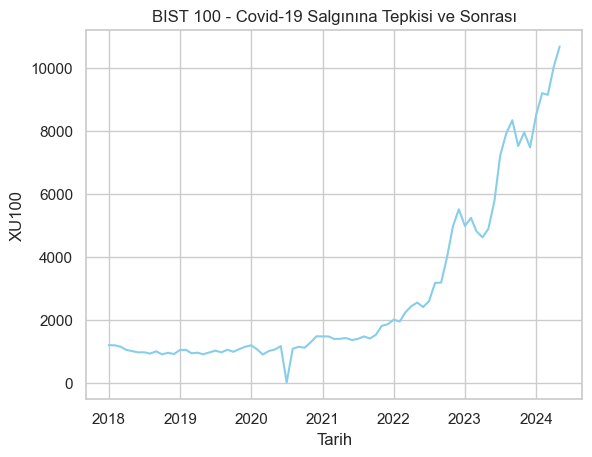

In [19]:
sembol = ['XU100.IS']
baslangic_tarih = '2018-01-01'
bitis_tarih = '2024-05-18'
frekans = '1mo'
duzeltilmis_df = endeks_basamak_kontrol(df_duzeltilecek=veriler_df)


sns.set_theme(style='whitegrid')
sns.lineplot(
    data=duzeltilmis_df,
    x='Tarih',
    y='XU100',
    color='skyblue',
    )

plt.title('BIST 100 - Covid-19 Salgınına Tepkisi ve Sonrası')


[*********************100%%**********************]  1 of 1 completed


Text(0.5, 1.0, "Altın'ın Covid-19 salgınına tepkisi")

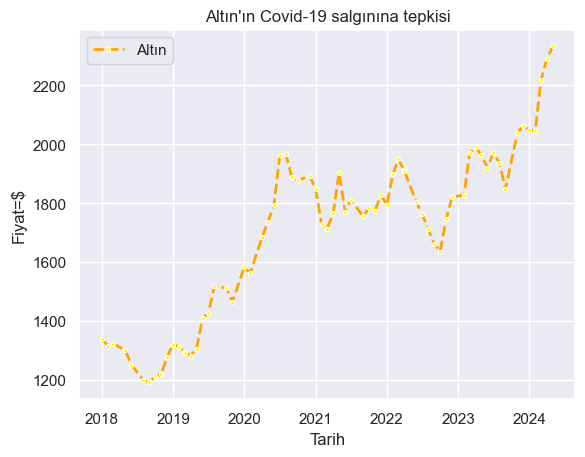

In [20]:
sembol = ['GC=F']
baslangic_tarih = '2018-01-01'
bitis_tarih = '2024-05-18'
frekans = '1mo'
    
veriler_df = yfinance_veri_cek(
    sembol = sembol,
    baslangic_tarih = baslangic_tarih,
    bitis_tarih = bitis_tarih,
    frekans = frekans
)
sns.set_theme(style='darkgrid')

sns.lineplot(
    data=veriler_df,
    x='Tarih',
    y='GC=F',
    color='orange',
    label='Altın',
    linewidth=2,
    marker='o',
    markersize=3,
    markerfacecolor='yellow',
    linestyle='--',
    dashes=True,
    )
plt.xlabel('Tarih')
plt.ylabel('Fiyat=$')
plt.title("Altın'ın Covid-19 salgınına tepkisi")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Text(0.5, 1.0, 'Covid-19 Salgının Dünya Borsasının Tepkileri')

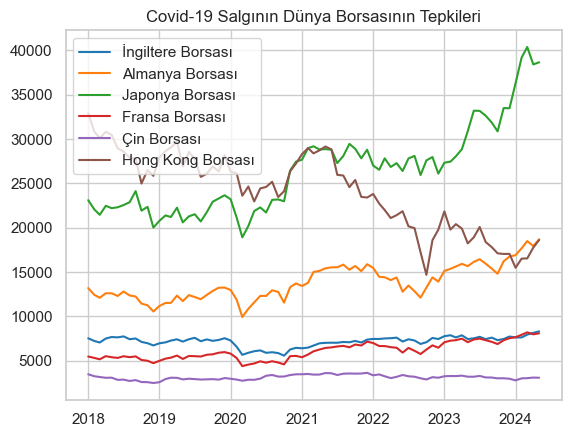

In [21]:
sembol = ['^FTSE', '^GDAXI', '^N225', '^FCHI', '000001.SS', '^HSI']
baslangic_tarih = '2018-01-01'
bitis_tarih = '2024-05-18'
frekans = '1mo'

veriler_df = yfinance_veri_cek(
    sembol = sembol,
    baslangic_tarih = baslangic_tarih,
    bitis_tarih = bitis_tarih,
    frekans = frekans
)
sns.set_theme(context='notebook', style='whitegrid', palette='tab10', font='sans-serif', font_scale=1, color_codes=True, rc=None)


sns.lineplot(
    data=veriler_df,
    x='Tarih',
    y='^FTSE',
    # color='orange',
    label='İngiltere Borsası',
    )
sns.lineplot(
    data=veriler_df,
    x='Tarih',
    y='^GDAXI',
    # color='red',
    label='Almanya Borsası',
    )
sns.lineplot(
    data=veriler_df,
    x='Tarih',
    y='^N225',
    # color='green',
    label='Japonya Borsası',
    )
sns.lineplot(
    data=veriler_df,
    x='Tarih',
    y='^FCHI',
    # color='b',
    label='Fransa Borsası',
    err_style='bars',
    )
sns.lineplot(
    data=veriler_df,
    x='Tarih',
    y='000001.SS',
    # color='b',
    label='Çin Borsası',
    )
sns.lineplot(
    data=veriler_df,
    x='Tarih',
    y='^HSI',
    # color='b',
    label='Hong Kong Borsası',
    )
plt.xlabel('')
plt.ylabel('')
plt.grid(True)
plt.title('Covid-19 Salgının Dünya Borsasının Tepkileri')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Text(0.5, 0, '')

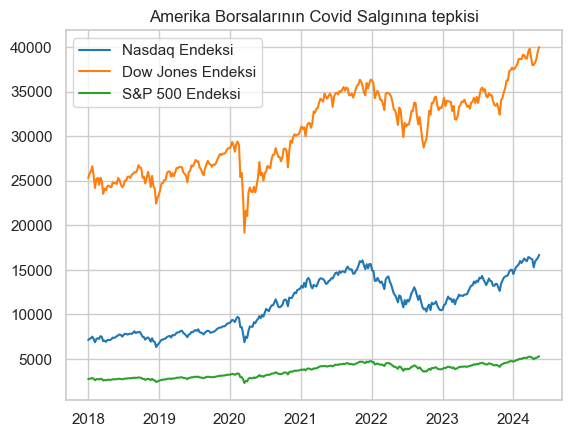

In [22]:
sembol = ['^IXIC', '^DJI', '^GSPC']
baslangic_tarih = '2018-01-01'
bitis_tarih = '2024-05-18'
frekans = '1wk'

veriler_df = yfinance_veri_cek(
    sembol = sembol,
    baslangic_tarih = baslangic_tarih,
    bitis_tarih = bitis_tarih,
    frekans = frekans
)
sns.set_theme(style='whitegrid', palette='tab10')
sns.lineplot(
    data=veriler_df,
    x='Tarih',
    y='^IXIC',
    # color='orange',
    label='Nasdaq Endeksi',
    )
sns.lineplot(
    data=veriler_df,
    x='Tarih',
    y='^DJI',
    # color='red',
    label='Dow Jones Endeksi',
    )
sns.lineplot(
    data=veriler_df,
    x='Tarih',
    y='^GSPC',
    # color='green',
    label='S&P 500 Endeksi'
    )
plt.title('Amerika Borsalarının Covid Salgınına tepkisi')
plt.ylabel('')
plt.xlabel('')

## Şimdilik bakacağımız - Dünya Borsalarının ve Altının Son 25 senede Nominal Anlamda Ne Kadar Getiri Sağladığına?



##### Aşağıda verdiğim tablo nominal anlamda uzun vadede hepimizin ölü olmadığına güzel bir örnek. Ama sadece bir borsada/varlıkta kalmak, çoğu zaman daha düşük getiri ve yüksek riskli bir yapı sağlıyor. Bunun yerine ortalama bir getiriyi amaçlamak riskimizi azaltacak ve karımızı maksimize etmese bile belli bir seviyenin üstünde kalmayı yani enflasyonu yenmemizi sağlayacak. Kısacası pozisyon almanın ve yatırım araçlarını çeşitlendirmenin çok önemli olduğunu buralardan anlayabiliyoruz.



In [23]:
NASDAQ = yf.download("^IXIC", start="1999-01-01", end="2024-01-01")
Dowjones = yf.download("^DJI", start="1999-01-01", end="2024-01-01")
SP500 = yf.download("^GSPC", start="1999-01-01", end="2024-01-01")
İngiltere = yf.download("^FTSE", start="1999-01-01", end="2024-01-01")
Almanya = yf.download("^GDAXI", start="1999-01-01", end="2024-01-01")
Japonya = yf.download("^N225", start="1999-01-01", end="2024-01-01")
Fransa = yf.download("^FCHI", start="1999-01-01", end="2024-01-01")
Çin = yf.download("000001.SS", start="1999-01-01", end="2024-01-01")
HongKong = yf.download("^HSI", start="1999-01-01", end="2024-01-01")
Altin = yf.download("GC=F", start="1999-01-01", end="2024-01-01")
Türkiye = yf.download("XU100.IS", start="1999-01-01", end="2024-01-01")
# Türkiye = Türkiye["Adj Close"]

# 27 Temmuz 2020 yılından itibaren verileri 100 ile çarpma (endekslerden iki sıfır atıldığı için)
Türkiye.loc['2020-07-27':] *= 100
ilk_fiyat10 = Türkiye["Adj Close"][0]
son_fiyat10 = Türkiye["Adj Close"][-1]
nominal_getiri10 = ((son_fiyat10 - ilk_fiyat10) / ilk_fiyat10) * 100



# Son fiyatı ve ilk fiyatı al
son_fiyat = NASDAQ["Adj Close"][-1]
ilk_fiyat = NASDAQ["Adj Close"][0]
son_fiyat1 = Dowjones["Adj Close"][-1]
ilk_fiyat1 = Dowjones["Adj Close"][0]
son_fiyat2 = SP500["Adj Close"][-1]
ilk_fiyat2 = SP500["Adj Close"][0]
son_fiyat3 = İngiltere["Adj Close"][-1]
ilk_fiyat3 = İngiltere["Adj Close"][0]
son_fiyat4 = Almanya["Adj Close"][-1]
ilk_fiyat4 = Almanya["Adj Close"][0]
son_fiyat5 = Japonya["Adj Close"][-1]
ilk_fiyat5 = Japonya["Adj Close"][0]
son_fiyat6 = Fransa["Adj Close"][-1]
ilk_fiyat6 = Fransa["Adj Close"][0]
son_fiyat7 = Çin["Adj Close"][-1]
ilk_fiyat7 = Çin["Adj Close"][0]
son_fiyat8 = HongKong["Adj Close"][-1]
ilk_fiyat8 = HongKong["Adj Close"][0]
son_fiyat9 = Altin["Adj Close"][-1]
ilk_fiyat9 = Altin["Adj Close"][0]


# Nominal getiriyi hesapla
nominal_getiri = ((son_fiyat - ilk_fiyat) / ilk_fiyat) * 100
nominal_getiri1 = ((son_fiyat1 - ilk_fiyat1) / ilk_fiyat1) * 100
nominal_getiri2 = ((son_fiyat2 - ilk_fiyat2) / ilk_fiyat2) * 100
nominal_getiri3 = ((son_fiyat3 - ilk_fiyat3) / ilk_fiyat3) * 100
nominal_getiri4 = ((son_fiyat4 - ilk_fiyat4) / ilk_fiyat4) * 100
nominal_getiri5 = ((son_fiyat5 - ilk_fiyat5) / ilk_fiyat5) * 100
nominal_getiri6 = ((son_fiyat6 - ilk_fiyat6) / ilk_fiyat6) * 100
nominal_getiri7 = ((son_fiyat7 - ilk_fiyat7) / ilk_fiyat7) * 100
nominal_getiri8 = ((son_fiyat8 - ilk_fiyat8) / ilk_fiyat8) * 100
nominal_getiri9 = ((son_fiyat9 - ilk_fiyat9) / ilk_fiyat9) * 100

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\BERK\AppData\Local\Temp\ipykernel_9988\2596430918.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behav

In [24]:
data = {
    "Borsalar ve Altın": ["NASDAQ", "Dow Jones", "S&P 500", "İngiltere", "Almanya", "Japonya", "Fransa", "Çin", "Hong Kong", "Altın","Türkiye"],
    "Nominal Getiri (%)": [nominal_getiri, nominal_getiri1, nominal_getiri2, nominal_getiri3, nominal_getiri4, nominal_getiri5, nominal_getiri6, nominal_getiri7, nominal_getiri8, nominal_getiri9, nominal_getiri10]
}

# Verileri Pandas yardımıyla Veri yapısına dönüştürelim
df = pd.DataFrame(data)

print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False, numalign="center", stralign="center", floatfmt='.1f'))

╒═════════════════════╤══════════════════════╕
│  Borsalar ve Altın  │  Nominal Getiri (%)  │
╞═════════════════════╪══════════════════════╡
│       NASDAQ        │        579.8         │
├─────────────────────┼──────────────────────┤
│      Dow Jones      │        310.4         │
├─────────────────────┼──────────────────────┤
│       S&P 500       │        288.4         │
├─────────────────────┼──────────────────────┤
│      İngiltere      │         31.5         │
├─────────────────────┼──────────────────────┤
│       Almanya       │        216.6         │
├─────────────────────┼──────────────────────┤
│       Japonya       │        149.4         │
├─────────────────────┼──────────────────────┤
│       Fransa        │         81.9         │
├─────────────────────┼──────────────────────┤
│         Çin         │        164.2         │
├─────────────────────┼──────────────────────┤
│      Hong Kong      │         73.8         │
├─────────────────────┼──────────────────────┤
│        Altı

In [ ]:
Türkiye = yf.download('XU100.IS', start='1999-01-01', end='2024-01-01')

Türkiye = Türkiye['Close']

# 2020 yılından itibaren verileri 100 ile çarpma (endekslerden iki sıfır atıldığı için)
Türkiye.loc['2020-07-27':] *= 100

# İlk ve son fiyatları al
ilk_fiyat = Türkiye[0]
son_fiyat = Türkiye[-1]

# Nominal getiri hesaplama
nominal_getiri = ((son_fiyat - ilk_fiyat) / ilk_fiyat) * 100

print(f"Bist 100 1999-2024 nominal getiri: {nominal_getiri:.2f}%")

# Bu verdiğim bilgilerden ne çıkarabiliriz?
##### 2008 yılında başlayan küresel krizde Fed’in uygulaması bir anlamda öncü uygulama olduğu ve diğer merkez bankalarına da örnek olduğu için burada kısaca Fed’in uygulamalarına değineceğiz.

##### Fed, bir yandan bankalara bu şekilde likidite sağlamanın yanı sıra faizleri düşürerek bankaların daha fazla kredi verebilmelerini sağlamayı ve bu yolla talebi ve dolayısıyla ekonomiyi canlandırmayı amaçlıyordu. Bir yandan bankalardan tahvilleri satın alarak piyasaya bol para veriyor, bir yandan o paraların düşük faizli kredi olarak sunulmasını ve harcamaya dönüşerek ekonominin canlanmasını sağlamaya çalışıyordu.


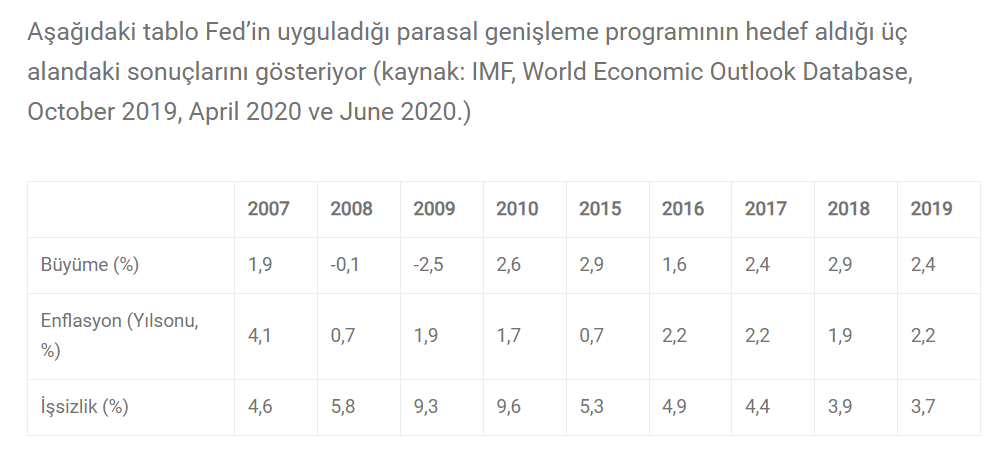

##### Tabloya baktığımızda ABD ekonomisinin bu uygulamalar sonucunda resesyondan çıkarak büyümeye geri döndüğünü, dolayısıyla uygulamaların bu alanda başarılı olduğunu söyleyebiliyoruz. Benzer bir yargıyı işsizlik oranındaki gerilemeye bakarak da yapabiliyoruz. Hatta bu uygulamalar ABD’yi doğal işsizlik oranı sayılan yüzde 4’ün bile altında bir işsizlik oranına getirmiştir. Enflasyon açısından da hedeflenen yüzde 2’lik oranın tutturulduğunu söyleyebiliriz.
##### Fed, ABD ekonomisinde beklenen toparlanmanın başladığı kanısına vardığı 2013 yılı Nisan ayındaki toplantısında yılsonuna doğru parasal genişlemeyi tedrici olarak kaldıracağını açıkladı. Bu açıklamaya uygun olarak aynı yılın Ekim ayından itibaren aylık satın alma miktarını kademe kademe düşürerek niceliksel genişleme uygulamasını 2014 yılı Kasım ayında tamamen kaldırdı. Niceliksel genişleme uygulaması başlarken 900 milyar dolayında olan Fed bilançosu bu uygulamanın kaldırıldığı tarihte yaklaşık olarak 4,5 trilyon Dolara ulaşmıştı. 2019 yılının son çeyreğinde işler karışınca Fed, parasal sıkılaştırma programından vazgeçerek yeniden parasal genişlemeye döndü ve faizler düşürdü.

## Para Basarak Ekonomik Sorunları Çözme Yaklaşımı

##### Niceliksel genişleme uygulamasının para basıp dağıtmaktan pek bir farkı yok. Tek fark, Merkez bankasının vadesi gelmemiş devlet veya finans kuruluşları tahvillerini parasını ödeyip alması olarak karşımıza çıkıyor. Eğer maliye politikası uygulanarak veya tahvil karşılığı olmaksızın para basılarak piyasaya likidite sürülmüş olsaydı ekonomi toparlandığında bu fazla likiditeyi çekmek için vergileri artırmak ya da yeni vergiler koymak gerekecekti. Bu uygulama vergi verenlerin tepkisini çekecek siyasetçiye oy kaybına mal olacaktı. Oysa bugünkü uygulamadan vergi verenlerin alınan ve verilenden haberi bile olmayacak. Aradaki bu fark, küresel krizde para politikasının niçin maliye politikasına tercih edildiği sorusunun yanıtıdır. 

##### Para basma tabusunun yıkılmasından sonra merkez bankaları iki yoldan birisini izlediler. Bazıları (Fed, BOE, ECB, BOJ gibi) basılan parayla piyasadan ağırlıklı olarak hazinenin ve bir miktar da finans kuruluşlarının tahvillerini satın aldılar. Bu uygulama dolaylı olarak hazinenin merkez bankası tarafından finanse edilmesi demekti. Diğer bazı merkez bankaları doğrudan para basıp kredi ya da destek gibi farklı yollarla hazineye veya doğrudan piyasaya verdiler. (*3)





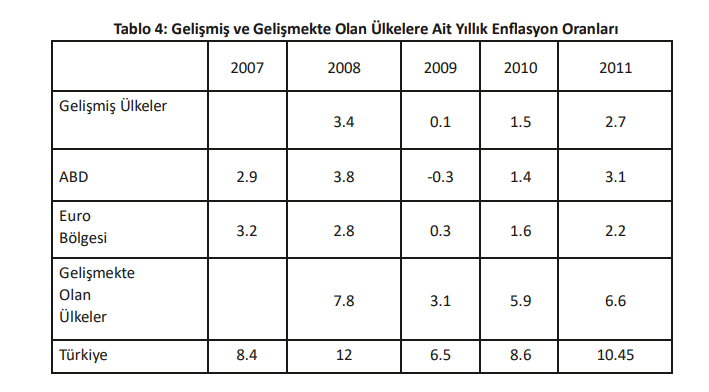

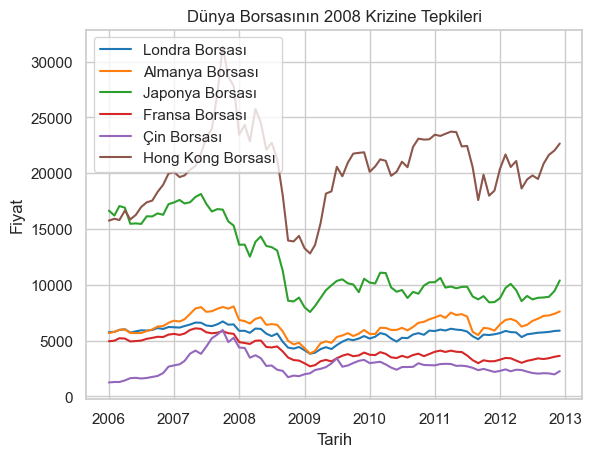
![2008 türkiye'ye lehman brothers krizi.png](<attachment:2008 türkiye'ye lehman brothers krizi.png>)
![altın 2008 tepki.png](<attachment:altın 2008 tepki.png>)
![amerika borsaları 2008.png](<attachment:amerika borsaları 2008.png>)

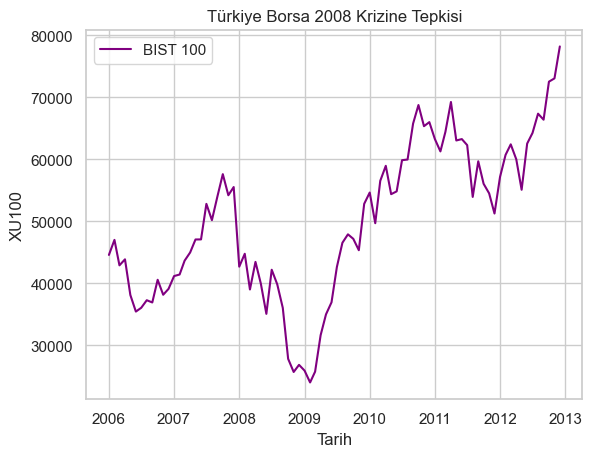
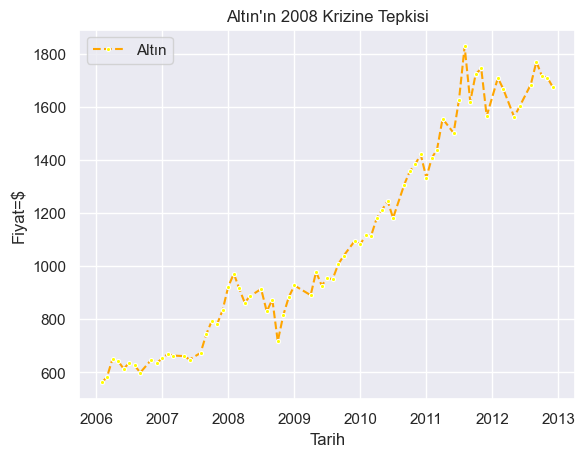
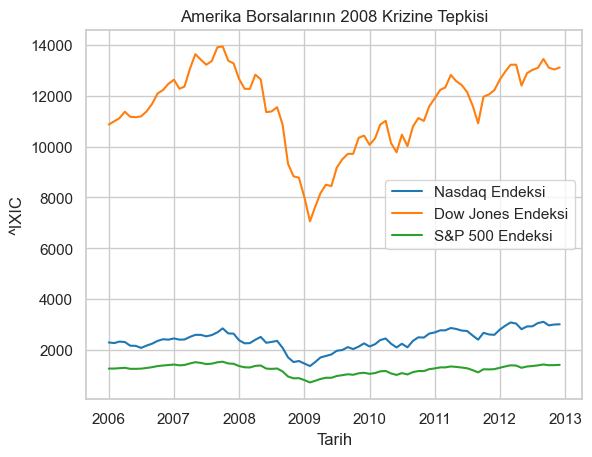

## 2008 Krizinde Borsalar üstte ve altta görüldüğü üzere götürüleri de çok fazla oldu.

#### 1 Ocak 2008'de parasını koyan birisi 1 Şubat 2009'a kadar tutsaydı parasının yarısını belki de daha fazlasını kaybetmiş olacaktı
#### Altın ise kriz zamanlarında daha az düşüp daha az çıkan araçların en başında geldiği için piyasanın öncüsü olarak gözüküyor.

In [25]:
NASDAQ = yf.download("^IXIC", start="2008-01-01", end="2009-02-01")
Dowjones = yf.download("^DJI", start="2008-01-01", end="2009-02-01")
SP500 = yf.download("^GSPC", start="2008-01-01", end="2009-02-01")
İngiltere = yf.download("^FTSE", start="2008-01-01", end="2009-02-01")
Almanya = yf.download("^GDAXI", start="2008-01-01", end="2009-02-01")
Japonya = yf.download("^N225", start="2008-01-01", end="2009-02-01")
Fransa = yf.download("^FCHI", start="2008-01-01", end="2009-02-01")
Çin = yf.download("000001.SS", start="2008-01-01", end="2009-02-01")
HongKong = yf.download("^HSI", start="2008-01-01", end="2009-02-01")
Altin = yf.download("GC=F", start="2008-01-01", end="2009-02-01")
Türkiye = yf.download('^XU100', start='2008-01-01', end='2009-02-01')



# Son fiyatı ve ilk fiyatı al
son_fiyat = NASDAQ["Adj Close"][-1]
ilk_fiyat = NASDAQ["Adj Close"][0]
son_fiyat1 = Dowjones["Adj Close"][-1]
ilk_fiyat1 = Dowjones["Adj Close"][0]
son_fiyat2 = SP500["Adj Close"][-1]
ilk_fiyat2 = SP500["Adj Close"][0]
son_fiyat3 = İngiltere["Adj Close"][-1]
ilk_fiyat3 = İngiltere["Adj Close"][0]
son_fiyat4 = Almanya["Adj Close"][-1]
ilk_fiyat4 = Almanya["Adj Close"][0]
son_fiyat5 = Japonya["Adj Close"][-1]
ilk_fiyat5 = Japonya["Adj Close"][0]
son_fiyat6 = Fransa["Adj Close"][-1]
ilk_fiyat6 = Fransa["Adj Close"][0]
son_fiyat7 = Çin["Adj Close"][-1]
ilk_fiyat7 = Çin["Adj Close"][0]
son_fiyat8 = HongKong["Adj Close"][-1]
ilk_fiyat8 = HongKong["Adj Close"][0]
son_fiyat9 = Altin["Adj Close"][-1]
ilk_fiyat9 = Altin["Adj Close"][0]
son_fiyat10 = Türkiye["Adj Close"][-1]
ilk_fiyat10 = Türkiye["Adj Close"][0]



# Nominal getiriyi hesapla
nominal_getiri = ((son_fiyat - ilk_fiyat) / ilk_fiyat) * 100
nominal_getiri1 = ((son_fiyat1 - ilk_fiyat1) / ilk_fiyat1) * 100
nominal_getiri2 = ((son_fiyat2 - ilk_fiyat2) / ilk_fiyat2) * 100
nominal_getiri3 = ((son_fiyat3 - ilk_fiyat3) / ilk_fiyat3) * 100
nominal_getiri4 = ((son_fiyat4 - ilk_fiyat4) / ilk_fiyat4) * 100
nominal_getiri5 = ((son_fiyat5 - ilk_fiyat5) / ilk_fiyat5) * 100
nominal_getiri6 = ((son_fiyat6 - ilk_fiyat6) / ilk_fiyat6) * 100
nominal_getiri7 = ((son_fiyat7 - ilk_fiyat7) / ilk_fiyat7) * 100
nominal_getiri8 = ((son_fiyat8 - ilk_fiyat8) / ilk_fiyat8) * 100
nominal_getiri9 = ((son_fiyat9 - ilk_fiyat9) / ilk_fiyat9) * 100
nominal_getiri10 = ((son_fiyat10 - ilk_fiyat10) / ilk_fiyat10) * 100

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\BERK\AppData\Local\Temp\ipykernel_9988\4149003953.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  son_fiyat

In [26]:
data = {
    "Borsalar ve Altın": ["NASDAQ", "Dow Jones", "S&P 500", "İngiltere", "Almanya", "Japonya", "Fransa", "Çin", "Hong Kong", "Altın", "Türkiye"],
    "Nominal Getiri (%)": [nominal_getiri, nominal_getiri1, nominal_getiri2, nominal_getiri3, nominal_getiri4, nominal_getiri5, nominal_getiri6, nominal_getiri7, nominal_getiri8, nominal_getiri9, nominal_getiri10]
}

# Verileri Pandas yardımıyla Veri yapısına dönüştürelim
df = pd.DataFrame(data)

print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False, numalign="center", stralign="center", floatfmt='.1f'))

╒═════════════════════╤══════════════════════╕
│  Borsalar ve Altın  │  Nominal Getiri (%)  │
╞═════════════════════╪══════════════════════╡
│       NASDAQ        │        -43.4         │
├─────────────────────┼──────────────────────┤
│      Dow Jones      │        -38.7         │
├─────────────────────┼──────────────────────┤
│       S&P 500       │        -42.9         │
├─────────────────────┼──────────────────────┤
│      İngiltere      │        -35.3         │
├─────────────────────┼──────────────────────┤
│       Almanya       │        -45.4         │
├─────────────────────┼──────────────────────┤
│       Japonya       │        -45.6         │
├─────────────────────┼──────────────────────┤
│       Fransa        │        -46.4         │
├─────────────────────┼──────────────────────┤
│         Çin         │        -62.2         │
├─────────────────────┼──────────────────────┤
│      Hong Kong      │        -51.8         │
├─────────────────────┼──────────────────────┤
│        Altı

### 2008 Krizinden sonra Parasal Genişleme 2009-2013 arasında Borsaları Nasıl Etkiledi?


In [27]:
NASDAQ = yf.download("^IXIC", start="2009-01-01", end="2013-01-01")
Dowjones = yf.download("^DJI", start="2009-01-01", end="2013-01-01")
SP500 = yf.download("^GSPC", start="2009-01-01", end="2013-01-01")
İngiltere = yf.download("^FTSE", start="2009-01-01", end="2013-01-01")
Almanya = yf.download("^GDAXI", start="2009-01-01", end="2013-01-01")
Japonya = yf.download("^N225", start="2009-01-01", end="2013-01-01")
Fransa = yf.download("^FCHI", start="2009-01-01", end="2013-01-01")
Çin = yf.download("000001.SS", start="2009-01-01", end="2013-01-01")
HongKong = yf.download("^HSI", start="2009-01-01", end="2013-01-01")
Altin = yf.download("GC=F", start="2009-01-01", end="2013-01-01")
Türkiye = yf.download('XU100.IS', start='2009-01-01', end='2013-01-01')
Türkiye = Türkiye['Close']

# 27 Temmuz 2020 yılından itibaren verileri 100 ile çarpma (endekslerden iki sıfır atıldığı için)
Türkiye.loc['2020-07-27':] *= 100
ilk_fiyat10 = Türkiye[0]
son_fiyat10 = Türkiye[-1]
nominal_getiri10 = ((son_fiyat10 - ilk_fiyat10) / ilk_fiyat10) * 100



# Son fiyatı ve ilk fiyatı al
son_fiyat = NASDAQ["Adj Close"][-1]
ilk_fiyat = NASDAQ["Adj Close"][0]
son_fiyat1 = Dowjones["Adj Close"][-1]
ilk_fiyat1 = Dowjones["Adj Close"][0]
son_fiyat2 = SP500["Adj Close"][-1]
ilk_fiyat2 = SP500["Adj Close"][0]
son_fiyat3 = İngiltere["Adj Close"][-1]
ilk_fiyat3 = İngiltere["Adj Close"][0]
son_fiyat4 = Almanya["Adj Close"][-1]
ilk_fiyat4 = Almanya["Adj Close"][0]
son_fiyat5 = Japonya["Adj Close"][-1]
ilk_fiyat5 = Japonya["Adj Close"][0]
son_fiyat6 = Fransa["Adj Close"][-1]
ilk_fiyat6 = Fransa["Adj Close"][0]
son_fiyat7 = Çin["Adj Close"][-1]
ilk_fiyat7 = Çin["Adj Close"][0]
son_fiyat8 = HongKong["Adj Close"][-1]
ilk_fiyat8 = HongKong["Adj Close"][0]
son_fiyat9 = Altin["Adj Close"][-1]
ilk_fiyat9 = Altin["Adj Close"][0]


# Nominal getiriyi hesapla
nominal_getiri = ((son_fiyat - ilk_fiyat) / ilk_fiyat) * 100
nominal_getiri1 = ((son_fiyat1 - ilk_fiyat1) / ilk_fiyat1) * 100
nominal_getiri2 = ((son_fiyat2 - ilk_fiyat2) / ilk_fiyat2) * 100
nominal_getiri3 = ((son_fiyat3 - ilk_fiyat3) / ilk_fiyat3) * 100
nominal_getiri4 = ((son_fiyat4 - ilk_fiyat4) / ilk_fiyat4) * 100
nominal_getiri5 = ((son_fiyat5 - ilk_fiyat5) / ilk_fiyat5) * 100
nominal_getiri6 = ((son_fiyat6 - ilk_fiyat6) / ilk_fiyat6) * 100
nominal_getiri7 = ((son_fiyat7 - ilk_fiyat7) / ilk_fiyat7) * 100
nominal_getiri8 = ((son_fiyat8 - ilk_fiyat8) / ilk_fiyat8) * 100
nominal_getiri9 = ((son_fiyat9 - ilk_fiyat9) / ilk_fiyat9) * 100


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\BERK\AppData\Local\Temp\ipykernel_9988\3150877893.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [28]:
data = {
    "Borsalar ve Altın": ["NASDAQ", "Dow Jones", "S&P 500", "İngiltere", "Almanya", "Japonya", "Fransa", "Çin", "Hong Kong", "Altın","Türkiye"],
    "Nominal Getiri (%)": [nominal_getiri, nominal_getiri1, nominal_getiri2, nominal_getiri3, nominal_getiri4, nominal_getiri5, nominal_getiri6, nominal_getiri7, nominal_getiri8, nominal_getiri9, nominal_getiri10]
}

# Verileri Pandas yardımıyla Veri yapısına dönüştürelim
df = pd.DataFrame(data)

print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False, numalign="center", stralign="center", floatfmt='.1f'))

╒═════════════════════╤══════════════════════╕
│  Borsalar ve Altın  │  Nominal Getiri (%)  │
╞═════════════════════╪══════════════════════╡
│       NASDAQ        │         85.0         │
├─────────────────────┼──────────────────────┤
│      Dow Jones      │         45.0         │
├─────────────────────┼──────────────────────┤
│       S&P 500       │         53.1         │
├─────────────────────┼──────────────────────┤
│      İngiltere      │         29.3         │
├─────────────────────┼──────────────────────┤
│       Almanya       │         53.1         │
├─────────────────────┼──────────────────────┤
│       Japonya       │         15.0         │
├─────────────────────┼──────────────────────┤
│       Fransa        │         8.1          │
├─────────────────────┼──────────────────────┤
│         Çin         │         20.7         │
├─────────────────────┼──────────────────────┤
│      Hong Kong      │         50.6         │
├─────────────────────┼──────────────────────┤
│        Altı

##### Parasal Politikalar ve Finans Haberleri: Türkiye ve Dünya Ekonomisi 2008 yılında Amerika ve Avrupa'da başlayan finansal kriz, resesyon koşullarını tetikledi. Gelişmiş ülkeler, resesyondan kurtulmak için parasal genişleme politikası ve düşük faiz politikası izlediler, bu da 2021 yılı itibariyle enflasyon baskısının artmasına neden oldu. 2008 krizi sonrasında, rezerv para avantajını kullanan gelişmiş ülkeler, yatırım fonları aracılığıyla bu paraları gelişmekte olan ülkelere aktardılar ve enflasyon sorununu dünyanın diğer ülkelerine yaydılar. Bu yıllar boyunca gelişmiş ülkelerde, farklı nedenlerden dolayı enflasyon baskısı arttı ve yüksek faiz politikasına geçildi.

##### 2008 krizinin enflasyon etkisi devam ederken, Covid-19 salgını ve Rusya-Ukrayna savaşının ardı ardına gelmesi, küresel çapta finansal kriz beklentilerini artırdı. Covid-19, dünya genelinde yoksullukla mücadeleyi olumsuz etkiledi ve 1.6 milyar insanı yoksulluk sınırının altına itti. Rusya-Ukrayna savaşı, dünyanın önde gelen şirketlerinin borsada büyük değer kaybetmesine yol açtı, ancak dünya ülkeleri 2022 ve 2023 yıllarında beklenen krize direnç gösterdi. Özellikle gelişmekte olan ülkeler, enflasyonla mücadele konusunda daha sıkı politikalar izlemek zorunda kaldılar. (*4)

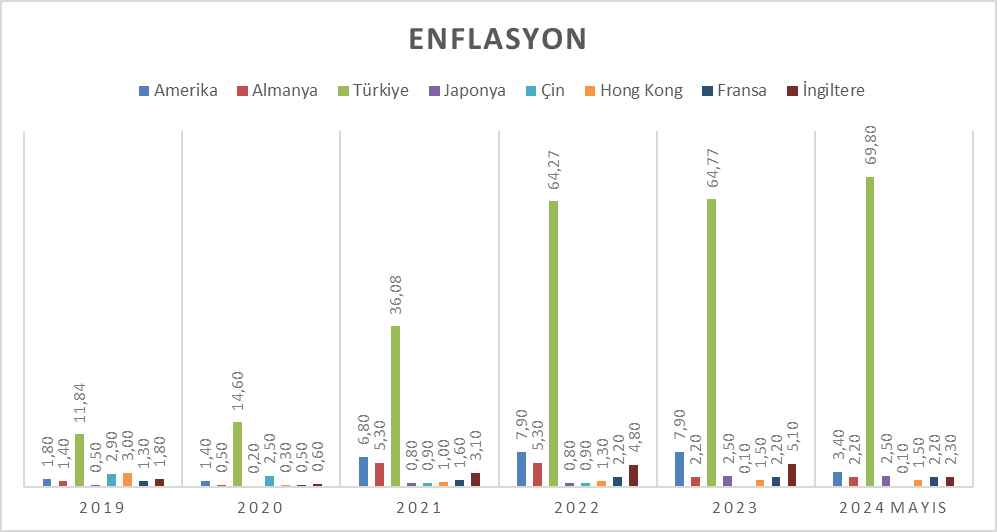

## Kendi Yorumum
#### Ülkeler yani hükümetler şimdiki zamanlarda faiz arttırarak sıkı bir daraltıcı bir politika izlemeye çalışırken aslında bu yüksek faiz uygularken para arzını arttırmaya devam ederek senyoraj geliri kazanmaya devam etmiştir. Bu tabii ki para değerlerinin her sene enflasyonla erimesi(en basitinden Amerika'nın ortalama enflasyonu son 10 sene içerisinde %3.51'dir, bu Doların 10 sene içerisinde minimum %25 değerini kaybettiğinin en belirgin göstergesidir) bir yandan ABD Dolarının da erimesi borsaların ve altının yükselmesini sağlamıştır. Altın ve incelediğimiz borsalarda enflasyona ve para değeri kaybına bağlı aşırı bir artış gerçekleşmiştir.

### Tabii ki bu durum sürdürülemeyecek bir noktaya girecek ve belli bir noktada Amerika'dan başlamak üzere borsalarda ani bir düşüş yaşanılacaktır, kaçınılmazdır. İlk küçük bankalar olmak üzere domino taşı misali büyük bankaları da batıracağının en büyük göstergesi yüksek faizlerin her işletme için bir yük olmasıdır.

### 2019-2024'ün Mayıs ayına kadar dünya borsalarının ve altının neredeyse 5.5 senede gösterdiği performans aşağıdaki gibidir.

In [29]:
NASDAQ = yf.download("^IXIC", start="2019-01-01", end="2024-05-01")
Dowjones = yf.download("^DJI", start="2019-01-01", end="2024-05-01")
SP500 = yf.download("^GSPC", start="2019-01-01", end="2024-05-01")
İngiltere = yf.download("^FTSE", start="2019-01-01", end="2024-05-01")
Almanya = yf.download("^GDAXI", start="2019-01-01", end="2024-05-01")
Japonya = yf.download("^N225", start="2019-01-01", end="2024-05-01")
Fransa = yf.download("^FCHI", start="2019-01-01", end="2024-05-01")
Çin = yf.download("000001.SS", start="2019-01-01", end="2024-05-01")
HongKong = yf.download("^HSI", start="2019-01-01", end="2024-05-01")
Altin = yf.download("GC=F", start="2019-01-01", end="2024-05-01")
Türkiye = yf.download('XU100.IS', start='2019-01-01', end='2024-05-01')
Türkiye = Türkiye['Close']

# 27 Temmuz 2020 yılından itibaren verileri 100 ile çarpma (endekslerden iki sıfır atıldığı için)
Türkiye.loc['2020-07-27':] *= 100
ilk_fiyat10 = Türkiye[0]
son_fiyat10 = Türkiye[-1]
nominal_getiri10 = ((son_fiyat10 - ilk_fiyat10) / ilk_fiyat10) * 100



# Son fiyatı ve ilk fiyatı al
son_fiyat = NASDAQ["Adj Close"][-1]
ilk_fiyat = NASDAQ["Adj Close"][0]
son_fiyat1 = Dowjones["Adj Close"][-1]
ilk_fiyat1 = Dowjones["Adj Close"][0]
son_fiyat2 = SP500["Adj Close"][-1]
ilk_fiyat2 = SP500["Adj Close"][0]
son_fiyat3 = İngiltere["Adj Close"][-1]
ilk_fiyat3 = İngiltere["Adj Close"][0]
son_fiyat4 = Almanya["Adj Close"][-1]
ilk_fiyat4 = Almanya["Adj Close"][0]
son_fiyat5 = Japonya["Adj Close"][-1]
ilk_fiyat5 = Japonya["Adj Close"][0]
son_fiyat6 = Fransa["Adj Close"][-1]
ilk_fiyat6 = Fransa["Adj Close"][0]
son_fiyat7 = Çin["Adj Close"][-1]
ilk_fiyat7 = Çin["Adj Close"][0]
son_fiyat8 = HongKong["Adj Close"][-1]
ilk_fiyat8 = HongKong["Adj Close"][0]
son_fiyat9 = Altin["Adj Close"][-1]
ilk_fiyat9 = Altin["Adj Close"][0]


# Nominal getiriyi hesapla
nominal_getiri = ((son_fiyat - ilk_fiyat) / ilk_fiyat) * 100
nominal_getiri1 = ((son_fiyat1 - ilk_fiyat1) / ilk_fiyat1) * 100
nominal_getiri2 = ((son_fiyat2 - ilk_fiyat2) / ilk_fiyat2) * 100
nominal_getiri3 = ((son_fiyat3 - ilk_fiyat3) / ilk_fiyat3) * 100
nominal_getiri4 = ((son_fiyat4 - ilk_fiyat4) / ilk_fiyat4) * 100
nominal_getiri5 = ((son_fiyat5 - ilk_fiyat5) / ilk_fiyat5) * 100
nominal_getiri6 = ((son_fiyat6 - ilk_fiyat6) / ilk_fiyat6) * 100
nominal_getiri7 = ((son_fiyat7 - ilk_fiyat7) / ilk_fiyat7) * 100
nominal_getiri8 = ((son_fiyat8 - ilk_fiyat8) / ilk_fiyat8) * 100
nominal_getiri9 = ((son_fiyat9 - ilk_fiyat9) / ilk_fiyat9) * 100

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\BERK\AppData\Local\Temp\ipykernel_9988\3886371350.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [30]:
data = {
    "Borsalar ve Altın": ["NASDAQ", "Dow Jones", "S&P 500", "İngiltere", "Almanya", "Japonya", "Fransa", "Çin", "Hong Kong", "Altın","Türkiye"],
    "Nominal Getiri (%)": [nominal_getiri, nominal_getiri1, nominal_getiri2, nominal_getiri3, nominal_getiri4, nominal_getiri5, nominal_getiri6, nominal_getiri7, nominal_getiri8, nominal_getiri9, nominal_getiri10]
}

# Verileri Pandas yardımıyla Veri yapısına dönüştürelim
df = pd.DataFrame(data)

print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False, numalign="center", stralign="center", floatfmt='.1f'))

╒═════════════════════╤══════════════════════╕
│  Borsalar ve Altın  │  Nominal Getiri (%)  │
╞═════════════════════╪══════════════════════╡
│       NASDAQ        │        134.9         │
├─────────────────────┼──────────────────────┤
│      Dow Jones      │         62.0         │
├─────────────────────┼──────────────────────┤
│       S&P 500       │        100.6         │
├─────────────────────┼──────────────────────┤
│      İngiltere      │         20.9         │
├─────────────────────┼──────────────────────┤
│       Almanya       │         69.5         │
├─────────────────────┼──────────────────────┤
│       Japonya       │         96.3         │
├─────────────────────┼──────────────────────┤
│       Fransa        │         70.3         │
├─────────────────────┼──────────────────────┤
│         Çin         │         25.9         │
├─────────────────────┼──────────────────────┤
│      Hong Kong      │        -29.3         │
├─────────────────────┼──────────────────────┤
│        Altı

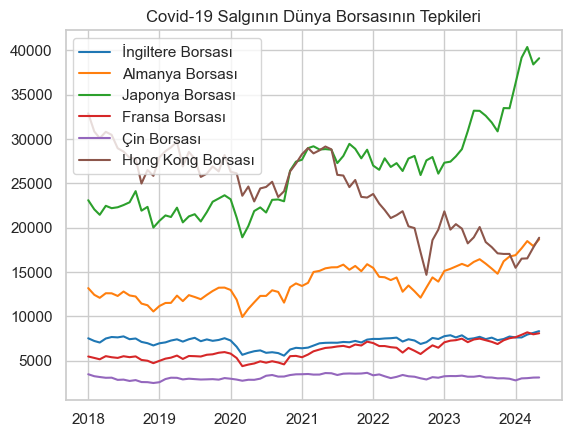 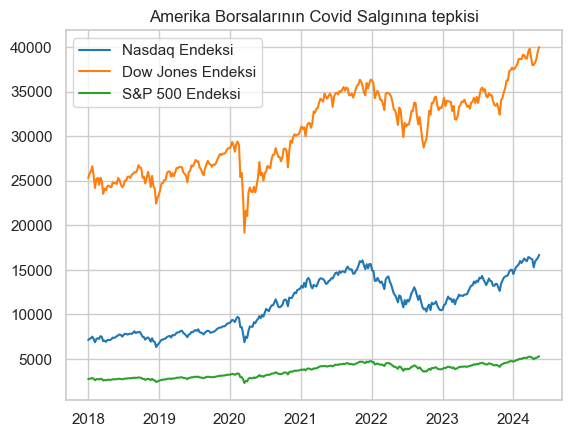
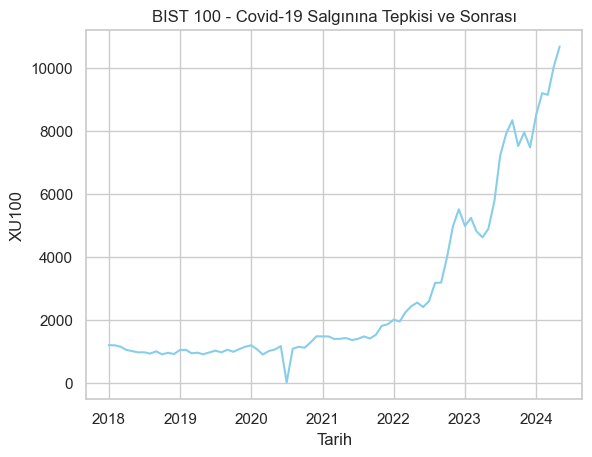 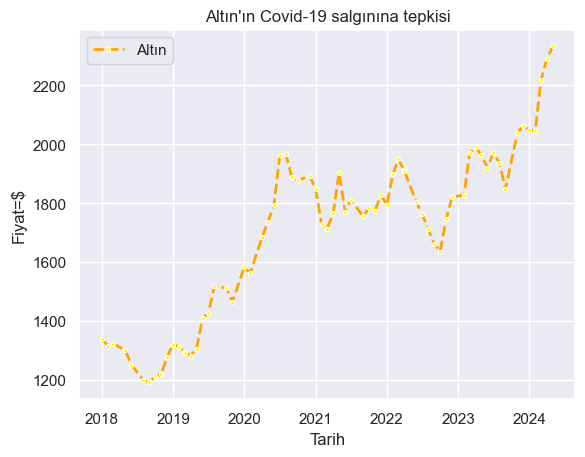


# Genel Düşüncem
### Türkiye borsasının son 25 senedir artması nominal anlamda güzel çünkü diğer paralara karşı kaybettiği değer göz önüne alınmıyor, 25 senenin son 3 senesi dışında dolar bazında artması düşük kalmıştır. Bunun sebebi de son zamanlarda yapılan sabit bir döviz kurunda tutmaya çalışmasıdır. 
### Amerika borsası özellikle NASDAQ, S&P 500, Altın ve gelişmekte olan ülke statüsündeki Türkiye(3*) son 4 senenin reel ve nominal bazlı kazananları olmuştur. Altın bir sigortadır ve değer koruma aracıdır. Altının çok yükselmesi doların değerini enflasyonla kaybetmesi, Doların güvenilirliğini kaybetmesi manasına gelir. Dünyadaki Merkez Bankalarının neredeyse hepsi Altın taşır, bu sigorta olduğunun en büyük göstergesidir.
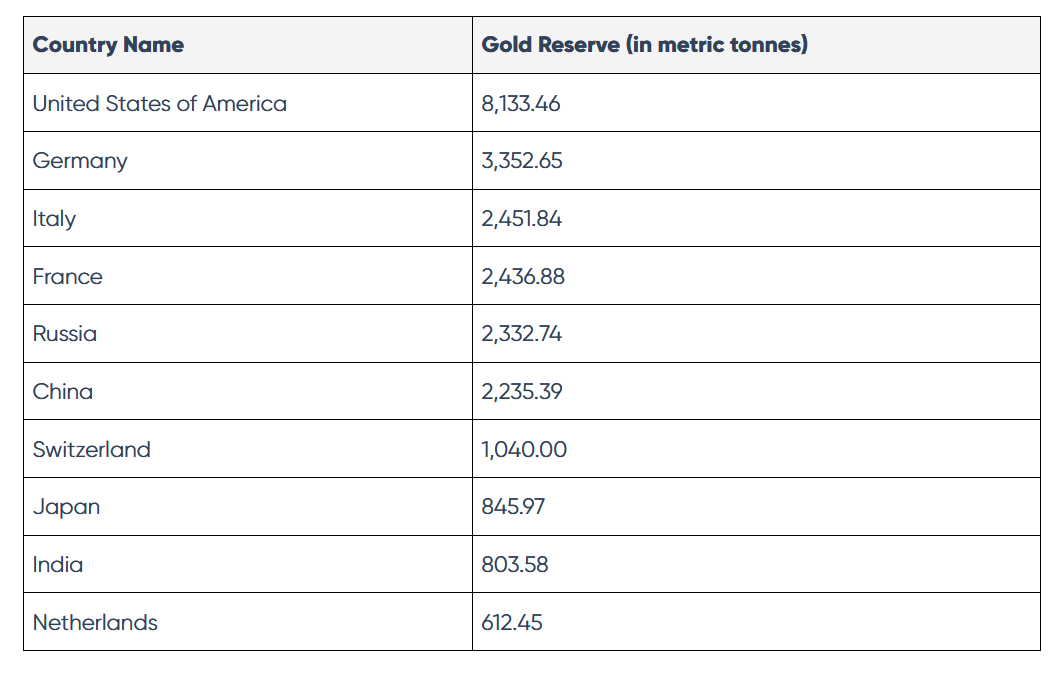 (*5)

###### KAYNAKÇA
###### 1. Dünyadaki Ekonomik Krizler ve Nedenleri - Midas Blog - https://www.getmidas.com/blog/dunyadaki-ekonomik-krizler-ve-nedenleri/#2001_Turkiye_Ekonomik_Krizi
###### 2. COVID-19 Krizinin İstihdam ve Çalışma Yöntemlerine Etkisi - Prof. Dr. Ahmet Cevat Acar - https://tuba.gov.tr/files/yayinlar/bilim-ve-dusun/TUBA-978-605-2249-46-8_Ch22.pdf
###### 3. 2008 Krizi Üzerine – Mahfi Eğilmez (İTD 120) - https://iktisatvetoplum.com/2008-krizi-uzerine-mahfi-egilmez-itd-120/
###### 4. https://www.pwc.com.tr/turkiye-ve-dunya-ekonomisindeki-son-gelismeler#:~:text=Enflasyondan%20en%20çok%20etkilenen%20ülke,Avrupa%20ülkeleri%20arasında%20birinci%20sıradadır.
###### 5. https://cleartax.in/s/countries-with-largest-gold-reserves-in-the-world

# BENİ DİNLEDİĞİNİZ İÇİN TEŞEKKÜR EDERİM!
